In [119]:
import numpy as np 
import pandas as pd 

def sigmoid(z):
    a = 1/(1+np.exp(-z))
    return a

def forward_prop(X, W1, b1):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    return A1

def logistic(X, Y, n_input, n_output, learning_rate= 0.0075, itera =30000, print_cost =False):
    
    W1 = np.random.randn(n_output, n_input)*0.001
    b1 = np.zeros((n_output, 1))
    
    m = Y.shape[1]
    costs = []
    for i in range(itera):
        Z1 = np.dot(W1, X) + b1
        A1 = sigmoid(Z1)
        
        cost = -np.sum(np.multiply(Y, np.log(A1))+np.multiply(1-Y, np.log(1-A1)))/m
        dA1 = - np.divide(Y, A1) + np.divide(1 - Y, 1 - A1)
        
        dZ1 = A1-Y
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims= True)/m
        
        W1 = W1 - learning_rate*dW1
        b1 = b1 - learning_rate*db1
        
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if  i % 100 == 0:
            costs.append(np.squeeze(cost))
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return W1, b1, costs 

In [150]:
np.random.seed(1)
train_x = np.random.randn(1, 1000)
train_y = np.zeros((1, 1000))
train_y[train_x>=0.1] = 1
train_y[train_x<0.1] = 0
layers_dims = [1,1]

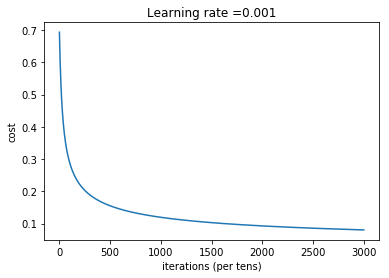

In [125]:
import matplotlib.pyplot as plt

W1, b1, costs = logistic(train_x, train_y,n_input=1, n_output=1, learning_rate=1e-3, itera = 300000, print_cost =False)

In [126]:
print (W1, b1)

[[ 8.07623062]] [[-0.86665621]]


In [158]:
from sklearn.metrics import accuracy_score
y_pred = forward_prop(train_x, W1, b1)
y_pred[y_pred>=0.5]=1
y_pred[y_pred<0.5]=0

#print (train_y, y_pred)

accuracy_score(np.squeeze(train_y), np.squeeze(y_pred))

0.998